# Setup

In [2]:
%load_ext autoreload
%autoreload 2
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
%matplotlib inline

In [4]:
import warnings
from matplotlib import rc
rc('text', usetex=True)
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings

In [6]:
from relaxed.analysis import get_mah, get_ma_corrs, get_fractional_tdyn, get_am_corrs

In [15]:
params = ['cvir', 'x0', 't/|u|', 'q', 'spin', 'b_to_a', 'c_to_a', 'cvir_klypin', 'spin_bullock']
latex_params = ['c_{\\rm vir}', 'x_{\\rm off}', 't/|u|', 'q', '\\lambda', 'b/a', 'c/a', 'c_{\\rm vir, klypin},', '\\lambda_{\\rm bullock}']
colors = ['r','b', 'g', 'm', 'k', 'y', 'c', 'orange', 'lime', 'gold']
markers = np.array(['.', 'x'])

In [16]:
mah_data = get_mah('m12', '../../output/', cutoff_missing=0.05, cutoff_particle=0.05)

cat = mah_data['cat']
scales = mah_data['scales']
indices = mah_data['indices']
am = mah_data['am']
mass_bins = mah_data['mass_bins']

# m(a) correlation plots

max_scales:  [0.42035, 0.63435, 0.56235, 0.59235, 0.50435, 0.59235, 0.59235, 0.37835, 0.50435]


(0.15, 1.0)

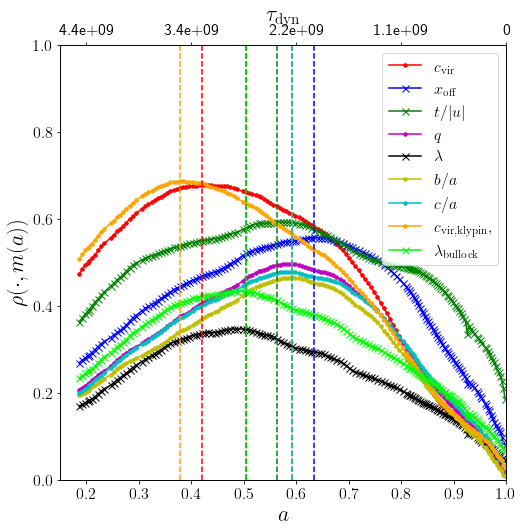

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
max_scales = [0.]*len(params)
tdyn = np.mean(cat['tdyn']) / 10**9 # Gyr which astropy also returns by default

for j, param in enumerate(params):
    latex_param = latex_params[j]
    color = colors[j]
    corrs = get_ma_corrs(cat, param, indices)
    pos = corrs > 0 
    neg = ~pos
    corrs = abs(corrs)

    # plot positive corr and negative corr with different markers. 
    if sum(pos) > 0:
        label = f'${latex_param}$' if sum(pos) > sum(neg) else None
        ax.plot(scales[pos], corrs[pos], color=color, marker=markers[0], label=label, markersize=7)

    if sum(neg) > 0:
        label = f'${latex_param}$' if sum(pos) < sum(neg) else None
        ax.plot(scales[neg], corrs[neg], color=color, marker=markers[1], label=label, markersize=7)

    max_scales[j] = scales[np.nanargmax(abs(corrs))]

# draw a vertical line at max scales
for j, s in enumerate(max_scales):
    color = colors[j]
    ax.axvline(s, linestyle='--', color=color)
print('max_scales: ', max_scales)


ax.set_ylim(0, 1.0)
ax.set_xlim(0, 1.0)
# ax.set_title(r"$\log_{10} M_{\rm vir} \in [12.0, 12.2]$", size=22)
ax.set_ylabel(f"$\\rho(\\cdot, m(a))$", size=22)
ax.set_xlabel(f"$a$", size=22)
ax.tick_params(axis='both', which='major', labelsize=16)

# add additional x-axis with tydn fractional scale
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

fractional_tdyn = get_fractional_tdyn(ax.get_xticks(), tdyn, sim_name='Bolshoi')
fractional_tdyn = np.array([f'{x:.2g}' for x in fractional_tdyn])
ax2.set_xticklabels(fractional_tdyn, size=16)
ax2.set_xlabel("$\\tau_{\\rm dyn}$", size=22)

ax.legend(loc='best', prop={'size': 16})

ax.set_xlim(0.15, 1)
ax2.set_xlim(0.15 , 1)


# a(m) correlations

cvir: 0.495
x0: 0.735
t/|u|: 0.673
q: 0.673
spin: 0.541
b_to_a: 0.673
c_to_a: 0.644
cvir_klypin: 0.397
spin_bullock: 0.541


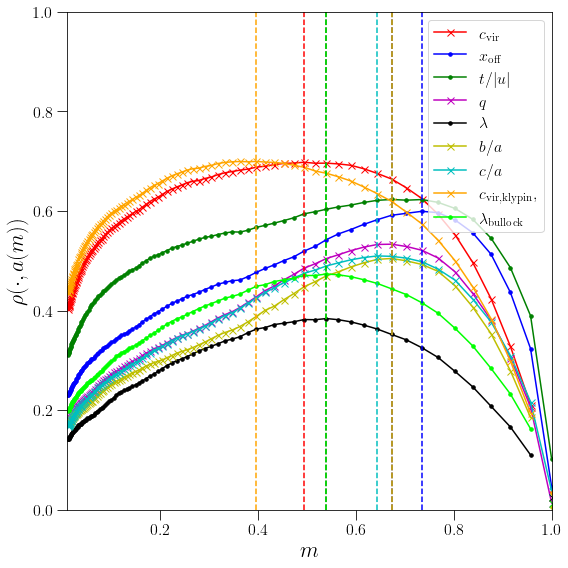

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
max_mass_bins = [0.]*len(params)

for j, param in enumerate(params):
    latex_param = latex_params[j]
    color = colors[j]
    corrs = get_am_corrs(cat, param, am)
    pos = corrs >= 0 
    neg = ~pos
    corrs = abs(corrs)

    # plot positive corr and negative corr with different markers. 
    if sum(pos) > 0:
        label = f'${latex_param}$' if sum(pos) > sum(neg) else None
        ax.plot(mass_bins[pos], corrs[pos], color=color, marker=markers[0], label=label, markersize=7)

    if sum(neg) > 0:
        label = f'${latex_param}$' if sum(pos) < sum(neg) else None
        ax.plot(mass_bins[neg], corrs[neg], color=color, marker=markers[1], label=label, markersize=7)

    max_mass_bins[j] = mass_bins[np.nanargmax(abs(corrs))]



# draw a vertical line at max scales
for j, mbin in enumerate(max_mass_bins):
    color = colors[j]
    ax.axvline(mbin, linestyle='--', color=color)
    print(f"{params[j]}: {mbin:.3f}")


ax.set_ylim(0, 1.0)
ax.set_xlim(0.01, 1.0)
ax.set_ylabel(f"$\\rho(\\cdot, a(m))$", size=22)
ax.set_xlabel(f"$m$", size=22)
ax.tick_params(axis='both', which='major', labelsize=16, size=10)    
ax.tick_params(axis='x', which='minor', size=8)    
ax.legend(loc='best', prop={'size': 16})

plt.tight_layout()
plt.show()